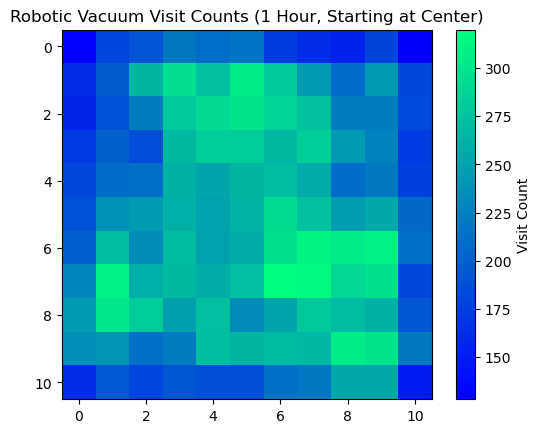

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the grid and visit counts
grid_size = 11
visit_counts = np.zeros((grid_size, grid_size))

# Define the starting position (center grid)
position = [grid_size // 2, grid_size // 2]

# Define the number of seconds in the simulation (1 hour)
num_seconds = 28800

# Run the simulation
for _ in range(num_seconds):
    # Update visit counts
    visit_counts[position[0], position[1]] += 1
    
    # Determine the next move
    moves = []
    if position[0] > 0:
        moves.append('up')
    if position[0] < grid_size - 1:
        moves.append('down')
    if position[1] > 0:
        moves.append('left')
    if position[1] < grid_size - 1:
        moves.append('right')
    move = np.random.choice(moves)
    
    # Update position
    if move == 'up':
        position[0] -= 1
    elif move == 'down':
        position[0] += 1
    elif move == 'left':
        position[1] -= 1
    elif move == 'right':
        position[1] += 1

# Plot the visit counts
plt.imshow(visit_counts, cmap='winter', interpolation='nearest')
plt.colorbar(label='Visit Count')
plt.title('Robotic Vacuum Visit Counts (1 Hour, Starting at Center)')
plt.show()

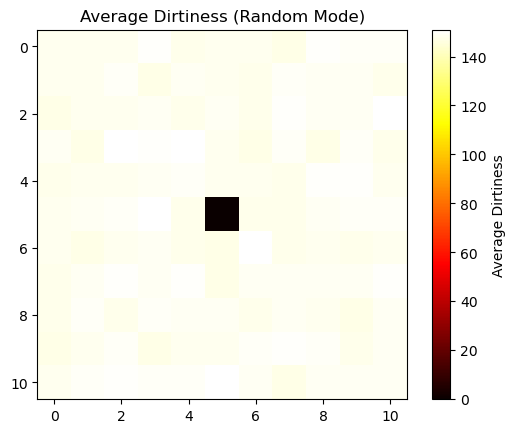

Random Mode: Central=146.86924205389036, Side=148.66194069131654, Corner=148.7570678254404


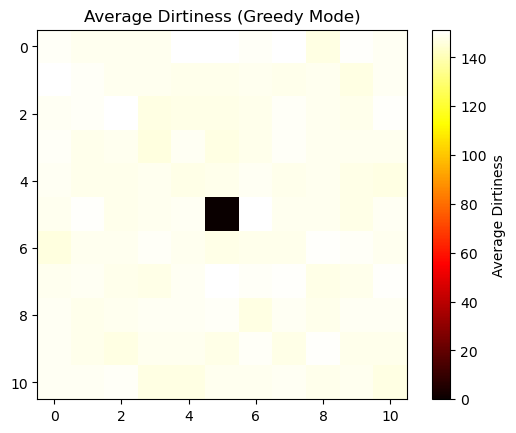

Greedy Mode: Central=146.82432202086179, Side=149.09323200578027, Corner=148.84160417769692


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 初始化参数
grid_size = 11
num_trials = 100
dirtiness_values = {
    'random': np.zeros((num_trials, grid_size, grid_size)),
    'greedy': np.zeros((num_trials, grid_size, grid_size))
}

# 运行模拟
for mode in ['random', 'greedy']:
    for trial in range(num_trials):
        dirtiness = np.zeros((grid_size, grid_size))
        position = (grid_size // 2, grid_size // 2) 
        for _ in range(3600):  # 假设运行时间为1小时
            # 每秒钟前，十个随机格子的污垢值增加
            for _ in range(10):
                i, j = np.random.randint(0, grid_size, size=2)
                dirtiness[i, j] += np.random.uniform(0, 1)
            # 机器人吸尘器移动
            if mode == 'random':
                # 随机模式下的移动逻辑（与第一问类似）
                pass
            elif mode == 'greedy':
                # 贪婪模式下的移动逻辑（朝着最脏的邻居格子移动）
                pass
            # 清理当前格子
            dirtiness[position] = 0
        # 存储试验结果
        dirtiness_values[mode][trial] = dirtiness

# 分析结果
for mode in ['random', 'greedy']:
    average_dirtiness = np.mean(dirtiness_values[mode], axis=0)
    plt.figure()
    plt.imshow(average_dirtiness, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Average Dirtiness')
    plt.title(f'Average Dirtiness ({mode.capitalize()} Mode)')
    plt.show()

    # 计算中心格子、侧面格子和角落格子的平均污垢值
    central_dirtiness = np.mean(average_dirtiness[1:-1, 1:-1])
    side_dirtiness = (np.mean(average_dirtiness[0, 1:-1]) +
                      np.mean(average_dirtiness[-1, 1:-1]) +
                      np.mean(average_dirtiness[1:-1, 0]) +
                      np.mean(average_dirtiness[1:-1, -1])) / 4
    corner_dirtiness = (average_dirtiness[0, 0] +
                        average_dirtiness[0, -1] +
                        average_dirtiness[-1, 0] +
                        average_dirtiness[-1, -1]) / 4
    print(f'{mode.capitalize()} Mode: Central={central_dirtiness}, Side={side_dirtiness}, Corner={corner_dirtiness}')


In [3]:
# Problem 4
import pulp, pandas as pd, matplotlib.pyplot as plt
import numpy

In [ ]:
hm = pulp.LpProblem('Hart', pulp.LpMaximize)

P = [pulp.LpVariable(f'P_{i}', lowBound=0) for i in range(3)]
y = [pulp.LpVariable(f'y_{i}', cat='Binary') for i in range(3)]

hm += 25*P[0] + 28*P[1] + 30*P[2] - 400*y[0] - 550*y[1] - 600*y[2]

hm += 1.5*P[0] + 3*P[1] + 2*P[2] <= 450
hm += 2*P[0] + 1*P[1] + 2.5*P[2] <= 350
hm += .25*P[0] + .25*P[1] + .25*P[2] <= 50

hm.solve()

for i in range(3): 
    print(f'P_{i} = {P[i].varValue}')
print(f'Profit: ${hm.objective.value()}')